<a href="https://colab.research.google.com/github/HarshithRKumar/Machine-Learning-Models/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/hypertension_dataset.csv')
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=df[['BP_History','Medication','Family_History','Exercise_Level','Smoking_Status','Has_Hypertension']]
for colm in col:
  df[colm]=le.fit_transform(df[colm])
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,1,6.4,25.8,4,1,1,0,1
1,32,11.7,10,1,5.4,23.4,4,0,1,0,0
2,78,9.5,3,1,7.1,18.7,4,0,2,0,0
3,38,10.0,10,0,4.2,22.1,0,0,1,0,1
4,41,9.8,1,2,5.8,16.2,3,0,2,0,0


In [ ]:
df=df.astype(int)
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8,9,1,6,25,4,1,1,0,1
1,32,11,10,1,5,23,4,0,1,0,0
2,78,9,3,1,7,18,4,0,2,0,0
3,38,10,10,0,4,22,0,0,1,0,1
4,41,9,1,2,5,16,3,0,2,0,0


In [ ]:
df.describe()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.078086,4.979345,1.025693,6.001008,25.560202,2.375819,0.496222,1.134509,0.286146,0.519899
std,19.442042,2.011672,3.142303,0.773714,1.570904,4.526415,1.559576,0.500112,0.714582,0.452072,0.499730
min,18.000000,2.000000,0.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,7.000000,2.000000,0.000000,5.000000,23.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,50.000000,8.000000,5.000000,1.000000,6.000000,25.000000,3.000000,0.000000,1.000000,0.000000,1.000000
75%,67.000000,9.000000,8.000000,2.000000,7.000000,29.000000,4.000000,1.000000,2.000000,1.000000,1.000000
max,84.000000,16.000000,10.000000,2.000000,11.000000,41.000000,4.000000,1.000000,2.000000,1.000000,1.000000


/tmp/ipython-input-1995088302.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salt_Intake'])


<Axes: xlabel='Salt_Intake', ylabel='Density'>

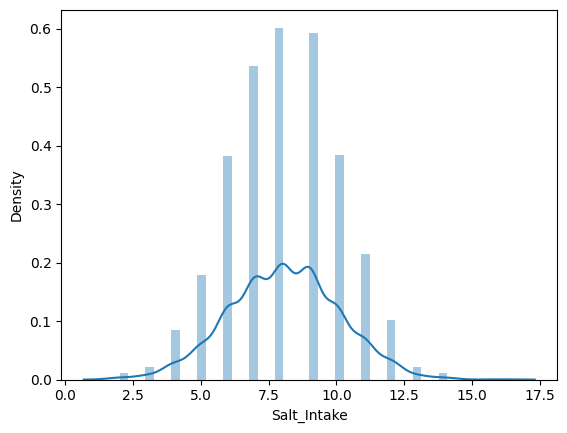

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['Salt_Intake'])

<Axes: ylabel='Salt_Intake'>

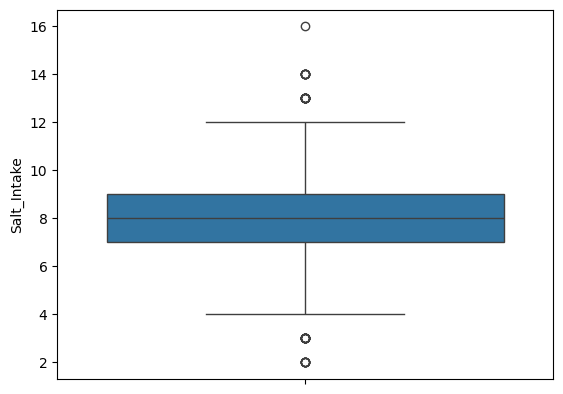

In [ ]:
sns.boxplot(df['Salt_Intake'])

In [ ]:
# Z score method

lower=df['Salt_Intake'].mean()-3*df['Salt_Intake'].std()
upper=df['Salt_Intake'].mean()+3*df['Salt_Intake'].std()
print(lower)
print(upper)

2.0430706036769113
14.113100680957848


In [ ]:
# trimming method
new_data=df[(df['Salt_Intake']<upper) & (df['Salt_Intake']>lower)]
print("original data:",len(df))
print("new data:",len(new_data))


original data: 1985
new data: 1977


In [ ]:
from sklearn.model_selection import train_test_split
x=new_data.drop(['Has_Hypertension'],axis=1)
y=new_data['Has_Hypertension']

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
print("accuracy:",acc)


accuracy: 0.9696969696969697
